In [1]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# If the import fails, run this
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [5]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [6]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [9]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10


194/391 [=============>................] - ETA: 14:32 - loss: 0.6922 - accuracy: 0.546 - ETA: 27s - loss: 0.6932 - accuracy: 0.5234  - ETA: 31s - loss: 0.6932 - accuracy: 0.519 - ETA: 34s - loss: 0.6934 - accuracy: 0.515 - ETA: 34s - loss: 0.6939 - accuracy: 0.505 - ETA: 32s - loss: 0.6943 - accuracy: 0.497 - ETA: 32s - loss: 0.6945 - accuracy: 0.492 - ETA: 31s - loss: 0.6946 - accuracy: 0.490 - ETA: 31s - loss: 0.6946 - accuracy: 0.491 - ETA: 30s - loss: 0.6946 - accuracy: 0.491 - ETA: 29s - loss: 0.6946 - accuracy: 0.489 - ETA: 31s - loss: 0.6946 - accuracy: 0.489 - ETA: 30s - loss: 0.6945 - accuracy: 0.489 - ETA: 29s - loss: 0.6945 - accuracy: 0.489 - ETA: 27s - loss: 0.6944 - accuracy: 0.490 - ETA: 27s - loss: 0.6944 - accuracy: 0.491 - ETA: 27s - loss: 0.6944 - accuracy: 0.491 - ETA: 27s - loss: 0.6943 - accuracy: 0.492 - ETA: 27s - loss: 0.6943 - accuracy: 0.493 - ETA: 27s - loss: 0.6943 - accuracy: 0.493 - ETA: 27s - loss: 0.6942 - accuracy: 0.494 - ETA: 26s - loss: 0.6942 - acc

391/391 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.55 - ETA: 0s - loss: 0.6882 - accuracy: 0.55 - ETA: 0s - loss: 0.6882 - accuracy: 0.55 - 47s 116ms/step - loss: 0.6881 - accuracy: 0.5520 - val_loss: 0.6181 - val_accuracy: 0.7593
Epoch 2/10


193/391 [=============>................] - ETA: 28s - loss: 0.5830 - accuracy: 0.781 - ETA: 20s - loss: 0.5979 - accuracy: 0.753 - ETA: 22s - loss: 0.6016 - accuracy: 0.747 - ETA: 22s - loss: 0.6039 - accuracy: 0.746 - ETA: 23s - loss: 0.6058 - accuracy: 0.744 - ETA: 22s - loss: 0.6069 - accuracy: 0.743 - ETA: 22s - loss: 0.6074 - accuracy: 0.743 - ETA: 21s - loss: 0.6076 - accuracy: 0.744 - ETA: 21s - loss: 0.6076 - accuracy: 0.744 - ETA: 22s - loss: 0.6075 - accuracy: 0.745 - ETA: 21s - loss: 0.6074 - accuracy: 0.745 - ETA: 22s - loss: 0.6072 - accuracy: 0.745 - ETA: 22s - loss: 0.6071 - accuracy: 0.746 - ETA: 22s - loss: 0.6070 - accuracy: 0.746 - ETA: 22s - loss: 0.6070 - accuracy: 0.746 - ETA: 22s - loss: 0.6071 - accuracy: 0.745 - ETA: 22s - loss: 0.6073 - accuracy: 0.745 - ETA: 22s - loss: 0.6074 - accuracy: 0.745 - ETA: 23s - loss: 0.6075 - accuracy: 0.744 - ETA: 23s - loss: 0.6076 - accuracy: 0.744 - ETA: 22s - loss: 0.6077 - accuracy: 0.744 - ETA: 22s - loss: 0.6077 - accurac

247/391 [=================>............] - ETA: 26s - loss: 0.3727 - accuracy: 0.906 - ETA: 21s - loss: 0.3945 - accuracy: 0.894 - ETA: 38s - loss: 0.4192 - accuracy: 0.867 - ETA: 33s - loss: 0.4301 - accuracy: 0.856 - ETA: 31s - loss: 0.4359 - accuracy: 0.849 - ETA: 30s - loss: 0.4368 - accuracy: 0.846 - ETA: 26s - loss: 0.4370 - accuracy: 0.844 - ETA: 26s - loss: 0.4377 - accuracy: 0.843 - ETA: 26s - loss: 0.4374 - accuracy: 0.843 - ETA: 25s - loss: 0.4363 - accuracy: 0.844 - ETA: 25s - loss: 0.4354 - accuracy: 0.845 - ETA: 25s - loss: 0.4346 - accuracy: 0.846 - ETA: 26s - loss: 0.4341 - accuracy: 0.846 - ETA: 26s - loss: 0.4338 - accuracy: 0.846 - ETA: 26s - loss: 0.4333 - accuracy: 0.846 - ETA: 26s - loss: 0.4330 - accuracy: 0.846 - ETA: 26s - loss: 0.4327 - accuracy: 0.846 - ETA: 25s - loss: 0.4323 - accuracy: 0.846 - ETA: 25s - loss: 0.4318 - accuracy: 0.846 - ETA: 25s - loss: 0.4313 - accuracy: 0.846 - ETA: 26s - loss: 0.4309 - accuracy: 0.846 - ETA: 26s - loss: 0.4306 - accurac

391/391 [==============================] - ETA: 7s - loss: 0.3987 - accuracy: 0.86 - ETA: 7s - loss: 0.3986 - accuracy: 0.86 - ETA: 7s - loss: 0.3985 - accuracy: 0.86 - ETA: 7s - loss: 0.3984 - accuracy: 0.86 - ETA: 7s - loss: 0.3983 - accuracy: 0.86 - ETA: 7s - loss: 0.3982 - accuracy: 0.86 - ETA: 7s - loss: 0.3980 - accuracy: 0.86 - ETA: 7s - loss: 0.3979 - accuracy: 0.86 - ETA: 7s - loss: 0.3978 - accuracy: 0.86 - ETA: 7s - loss: 0.3977 - accuracy: 0.86 - ETA: 6s - loss: 0.3975 - accuracy: 0.86 - ETA: 6s - loss: 0.3974 - accuracy: 0.86 - ETA: 6s - loss: 0.3973 - accuracy: 0.86 - ETA: 6s - loss: 0.3972 - accuracy: 0.86 - ETA: 6s - loss: 0.3971 - accuracy: 0.86 - ETA: 6s - loss: 0.3970 - accuracy: 0.86 - ETA: 6s - loss: 0.3969 - accuracy: 0.86 - ETA: 6s - loss: 0.3968 - accuracy: 0.86 - ETA: 6s - loss: 0.3966 - accuracy: 0.86 - ETA: 6s - loss: 0.3965 - accuracy: 0.86 - ETA: 6s - loss: 0.3963 - accuracy: 0.86 - ETA: 6s - loss: 0.3961 - accuracy: 0.86 - ETA: 6s - loss: 0.3960 - accuracy

256/391 [==================>...........] - ETA: 24s - loss: 0.3657 - accuracy: 0.875 - ETA: 15s - loss: 0.3257 - accuracy: 0.892 - ETA: 16s - loss: 0.3151 - accuracy: 0.901 - ETA: 16s - loss: 0.3134 - accuracy: 0.901 - ETA: 16s - loss: 0.3090 - accuracy: 0.902 - ETA: 16s - loss: 0.3065 - accuracy: 0.901 - ETA: 16s - loss: 0.3065 - accuracy: 0.901 - ETA: 16s - loss: 0.3061 - accuracy: 0.900 - ETA: 17s - loss: 0.3061 - accuracy: 0.900 - ETA: 16s - loss: 0.3054 - accuracy: 0.900 - ETA: 16s - loss: 0.3044 - accuracy: 0.900 - ETA: 16s - loss: 0.3036 - accuracy: 0.900 - ETA: 16s - loss: 0.3031 - accuracy: 0.899 - ETA: 15s - loss: 0.3031 - accuracy: 0.899 - ETA: 16s - loss: 0.3031 - accuracy: 0.899 - ETA: 16s - loss: 0.3029 - accuracy: 0.898 - ETA: 16s - loss: 0.3027 - accuracy: 0.898 - ETA: 15s - loss: 0.3024 - accuracy: 0.898 - ETA: 15s - loss: 0.3023 - accuracy: 0.898 - ETA: 16s - loss: 0.3023 - accuracy: 0.897 - ETA: 16s - loss: 0.3023 - accuracy: 0.897 - ETA: 16s - loss: 0.3022 - accurac

211/391 [===============>..............] - ETA: 31s - loss: 0.3674 - accuracy: 0.906 - ETA: 17s - loss: 0.3187 - accuracy: 0.910 - ETA: 21s - loss: 0.3107 - accuracy: 0.910 - ETA: 22s - loss: 0.3070 - accuracy: 0.908 - ETA: 22s - loss: 0.3071 - accuracy: 0.906 - ETA: 22s - loss: 0.3052 - accuracy: 0.905 - ETA: 22s - loss: 0.3035 - accuracy: 0.904 - ETA: 23s - loss: 0.3022 - accuracy: 0.903 - ETA: 22s - loss: 0.2983 - accuracy: 0.902 - ETA: 22s - loss: 0.2967 - accuracy: 0.902 - ETA: 22s - loss: 0.2955 - accuracy: 0.902 - ETA: 22s - loss: 0.2944 - accuracy: 0.902 - ETA: 22s - loss: 0.2933 - accuracy: 0.902 - ETA: 22s - loss: 0.2921 - accuracy: 0.902 - ETA: 22s - loss: 0.2911 - accuracy: 0.902 - ETA: 21s - loss: 0.2888 - accuracy: 0.903 - ETA: 20s - loss: 0.2865 - accuracy: 0.903 - ETA: 20s - loss: 0.2849 - accuracy: 0.903 - ETA: 20s - loss: 0.2845 - accuracy: 0.903 - ETA: 20s - loss: 0.2841 - accuracy: 0.904 - ETA: 20s - loss: 0.2838 - accuracy: 0.904 - ETA: 20s - loss: 0.2834 - accurac

391/391 [==============================] - ETA: 11s - loss: 0.2680 - accuracy: 0.910 - ETA: 11s - loss: 0.2680 - accuracy: 0.910 - ETA: 10s - loss: 0.2679 - accuracy: 0.910 - ETA: 10s - loss: 0.2679 - accuracy: 0.910 - ETA: 10s - loss: 0.2679 - accuracy: 0.910 - ETA: 10s - loss: 0.2678 - accuracy: 0.910 - ETA: 10s - loss: 0.2678 - accuracy: 0.910 - ETA: 10s - loss: 0.2678 - accuracy: 0.910 - ETA: 10s - loss: 0.2677 - accuracy: 0.910 - ETA: 10s - loss: 0.2677 - accuracy: 0.910 - ETA: 10s - loss: 0.2677 - accuracy: 0.910 - ETA: 10s - loss: 0.2676 - accuracy: 0.910 - ETA: 10s - loss: 0.2676 - accuracy: 0.910 - ETA: 10s - loss: 0.2676 - accuracy: 0.910 - ETA: 10s - loss: 0.2675 - accuracy: 0.910 - ETA: 10s - loss: 0.2675 - accuracy: 0.910 - ETA: 10s - loss: 0.2675 - accuracy: 0.910 - ETA: 10s - loss: 0.2675 - accuracy: 0.910 - ETA: 10s - loss: 0.2674 - accuracy: 0.910 - ETA: 10s - loss: 0.2674 - accuracy: 0.910 - ETA: 9s - loss: 0.2674 - accuracy: 0.910 - ETA: 9s - loss: 0.2673 - accuracy:

244/391 [=================>............] - ETA: 30s - loss: 0.2602 - accuracy: 0.906 - ETA: 23s - loss: 0.2278 - accuracy: 0.921 - ETA: 22s - loss: 0.2199 - accuracy: 0.923 - ETA: 22s - loss: 0.2204 - accuracy: 0.922 - ETA: 22s - loss: 0.2229 - accuracy: 0.920 - ETA: 20s - loss: 0.2312 - accuracy: 0.915 - ETA: 19s - loss: 0.2370 - accuracy: 0.911 - ETA: 19s - loss: 0.2381 - accuracy: 0.910 - ETA: 19s - loss: 0.2386 - accuracy: 0.911 - ETA: 19s - loss: 0.2389 - accuracy: 0.911 - ETA: 19s - loss: 0.2389 - accuracy: 0.911 - ETA: 18s - loss: 0.2383 - accuracy: 0.912 - ETA: 18s - loss: 0.2381 - accuracy: 0.912 - ETA: 18s - loss: 0.2372 - accuracy: 0.913 - ETA: 18s - loss: 0.2368 - accuracy: 0.913 - ETA: 17s - loss: 0.2366 - accuracy: 0.913 - ETA: 17s - loss: 0.2366 - accuracy: 0.913 - ETA: 17s - loss: 0.2364 - accuracy: 0.913 - ETA: 17s - loss: 0.2361 - accuracy: 0.913 - ETA: 17s - loss: 0.2360 - accuracy: 0.914 - ETA: 17s - loss: 0.2357 - accuracy: 0.914 - ETA: 17s - loss: 0.2356 - accurac

224/391 [================>.............] - ETA: 22s - loss: 0.1200 - accuracy: 0.953 - ETA: 19s - loss: 0.1481 - accuracy: 0.953 - ETA: 23s - loss: 0.1587 - accuracy: 0.953 - ETA: 24s - loss: 0.1655 - accuracy: 0.951 - ETA: 20s - loss: 0.1728 - accuracy: 0.948 - ETA: 20s - loss: 0.1757 - accuracy: 0.946 - ETA: 21s - loss: 0.1789 - accuracy: 0.945 - ETA: 21s - loss: 0.1812 - accuracy: 0.944 - ETA: 22s - loss: 0.1834 - accuracy: 0.943 - ETA: 22s - loss: 0.1857 - accuracy: 0.941 - ETA: 22s - loss: 0.1884 - accuracy: 0.939 - ETA: 22s - loss: 0.1913 - accuracy: 0.937 - ETA: 22s - loss: 0.1939 - accuracy: 0.936 - ETA: 22s - loss: 0.1987 - accuracy: 0.933 - ETA: 21s - loss: 0.2002 - accuracy: 0.932 - ETA: 21s - loss: 0.2016 - accuracy: 0.932 - ETA: 21s - loss: 0.2039 - accuracy: 0.930 - ETA: 20s - loss: 0.2056 - accuracy: 0.930 - ETA: 20s - loss: 0.2063 - accuracy: 0.929 - ETA: 20s - loss: 0.2070 - accuracy: 0.929 - ETA: 20s - loss: 0.2076 - accuracy: 0.929 - ETA: 20s - loss: 0.2082 - accurac

391/391 [==============================] - ETA: 9s - loss: 0.2160 - accuracy: 0.92 - ETA: 9s - loss: 0.2160 - accuracy: 0.92 - ETA: 9s - loss: 0.2160 - accuracy: 0.92 - ETA: 9s - loss: 0.2160 - accuracy: 0.92 - ETA: 9s - loss: 0.2160 - accuracy: 0.92 - ETA: 9s - loss: 0.2160 - accuracy: 0.92 - ETA: 8s - loss: 0.2160 - accuracy: 0.92 - ETA: 8s - loss: 0.2160 - accuracy: 0.92 - ETA: 8s - loss: 0.2160 - accuracy: 0.92 - ETA: 8s - loss: 0.2159 - accuracy: 0.92 - ETA: 8s - loss: 0.2159 - accuracy: 0.92 - ETA: 8s - loss: 0.2159 - accuracy: 0.92 - ETA: 8s - loss: 0.2159 - accuracy: 0.92 - ETA: 8s - loss: 0.2159 - accuracy: 0.92 - ETA: 8s - loss: 0.2159 - accuracy: 0.92 - ETA: 8s - loss: 0.2158 - accuracy: 0.92 - ETA: 8s - loss: 0.2158 - accuracy: 0.92 - ETA: 8s - loss: 0.2158 - accuracy: 0.92 - ETA: 8s - loss: 0.2158 - accuracy: 0.92 - ETA: 8s - loss: 0.2158 - accuracy: 0.92 - ETA: 8s - loss: 0.2158 - accuracy: 0.92 - ETA: 8s - loss: 0.2158 - accuracy: 0.92 - ETA: 8s - loss: 0.2158 - accuracy

203/391 [==============>...............] - ETA: 27s - loss: 0.2009 - accuracy: 0.953 - ETA: 23s - loss: 0.2045 - accuracy: 0.953 - ETA: 23s - loss: 0.2043 - accuracy: 0.946 - ETA: 23s - loss: 0.1986 - accuracy: 0.946 - ETA: 21s - loss: 0.1951 - accuracy: 0.943 - ETA: 22s - loss: 0.1946 - accuracy: 0.941 - ETA: 21s - loss: 0.1932 - accuracy: 0.941 - ETA: 21s - loss: 0.1927 - accuracy: 0.939 - ETA: 21s - loss: 0.1927 - accuracy: 0.938 - ETA: 21s - loss: 0.1929 - accuracy: 0.937 - ETA: 22s - loss: 0.1939 - accuracy: 0.935 - ETA: 22s - loss: 0.1948 - accuracy: 0.934 - ETA: 22s - loss: 0.1955 - accuracy: 0.933 - ETA: 23s - loss: 0.1963 - accuracy: 0.933 - ETA: 23s - loss: 0.1972 - accuracy: 0.932 - ETA: 23s - loss: 0.1982 - accuracy: 0.931 - ETA: 22s - loss: 0.1997 - accuracy: 0.931 - ETA: 22s - loss: 0.2001 - accuracy: 0.930 - ETA: 23s - loss: 0.2008 - accuracy: 0.930 - ETA: 23s - loss: 0.2014 - accuracy: 0.929 - ETA: 23s - loss: 0.2017 - accuracy: 0.929 - ETA: 22s - loss: 0.2020 - accurac

224/391 [================>.............] - ETA: 30s - loss: 0.1711 - accuracy: 0.953 - ETA: 20s - loss: 0.1533 - accuracy: 0.957 - ETA: 21s - loss: 0.1497 - accuracy: 0.957 - ETA: 21s - loss: 0.1546 - accuracy: 0.952 - ETA: 19s - loss: 0.1596 - accuracy: 0.947 - ETA: 19s - loss: 0.1621 - accuracy: 0.946 - ETA: 20s - loss: 0.1631 - accuracy: 0.946 - ETA: 20s - loss: 0.1643 - accuracy: 0.945 - ETA: 20s - loss: 0.1653 - accuracy: 0.946 - ETA: 20s - loss: 0.1655 - accuracy: 0.946 - ETA: 21s - loss: 0.1667 - accuracy: 0.945 - ETA: 20s - loss: 0.1679 - accuracy: 0.944 - ETA: 19s - loss: 0.1693 - accuracy: 0.944 - ETA: 19s - loss: 0.1698 - accuracy: 0.943 - ETA: 20s - loss: 0.1703 - accuracy: 0.943 - ETA: 20s - loss: 0.1705 - accuracy: 0.943 - ETA: 20s - loss: 0.1707 - accuracy: 0.942 - ETA: 19s - loss: 0.1709 - accuracy: 0.942 - ETA: 19s - loss: 0.1710 - accuracy: 0.942 - ETA: 19s - loss: 0.1712 - accuracy: 0.942 - ETA: 19s - loss: 0.1713 - accuracy: 0.942 - ETA: 20s - loss: 0.1714 - accurac

391/391 [==============================] - ETA: 9s - loss: 0.1793 - accuracy: 0.93 - ETA: 9s - loss: 0.1793 - accuracy: 0.93 - ETA: 9s - loss: 0.1793 - accuracy: 0.93 - ETA: 9s - loss: 0.1793 - accuracy: 0.93 - ETA: 9s - loss: 0.1793 - accuracy: 0.93 - ETA: 9s - loss: 0.1793 - accuracy: 0.93 - ETA: 9s - loss: 0.1794 - accuracy: 0.93 - ETA: 9s - loss: 0.1794 - accuracy: 0.93 - ETA: 8s - loss: 0.1794 - accuracy: 0.93 - ETA: 8s - loss: 0.1794 - accuracy: 0.93 - ETA: 8s - loss: 0.1794 - accuracy: 0.93 - ETA: 8s - loss: 0.1794 - accuracy: 0.93 - ETA: 8s - loss: 0.1795 - accuracy: 0.93 - ETA: 8s - loss: 0.1795 - accuracy: 0.93 - ETA: 8s - loss: 0.1795 - accuracy: 0.93 - ETA: 8s - loss: 0.1795 - accuracy: 0.93 - ETA: 8s - loss: 0.1795 - accuracy: 0.93 - ETA: 8s - loss: 0.1795 - accuracy: 0.93 - ETA: 8s - loss: 0.1795 - accuracy: 0.93 - ETA: 8s - loss: 0.1796 - accuracy: 0.93 - ETA: 8s - loss: 0.1796 - accuracy: 0.93 - ETA: 8s - loss: 0.1796 - accuracy: 0.93 - ETA: 7s - loss: 0.1796 - accuracy

228/391 [================>.............] - ETA: 26s - loss: 0.1272 - accuracy: 0.937 - ETA: 22s - loss: 0.1362 - accuracy: 0.937 - ETA: 28s - loss: 0.1382 - accuracy: 0.941 - ETA: 27s - loss: 0.1412 - accuracy: 0.941 - ETA: 27s - loss: 0.1430 - accuracy: 0.941 - ETA: 26s - loss: 0.1447 - accuracy: 0.940 - ETA: 26s - loss: 0.1443 - accuracy: 0.940 - ETA: 25s - loss: 0.1435 - accuracy: 0.941 - ETA: 26s - loss: 0.1443 - accuracy: 0.942 - ETA: 25s - loss: 0.1455 - accuracy: 0.942 - ETA: 26s - loss: 0.1466 - accuracy: 0.942 - ETA: 26s - loss: 0.1469 - accuracy: 0.942 - ETA: 26s - loss: 0.1468 - accuracy: 0.943 - ETA: 25s - loss: 0.1466 - accuracy: 0.943 - ETA: 25s - loss: 0.1470 - accuracy: 0.944 - ETA: 25s - loss: 0.1474 - accuracy: 0.944 - ETA: 25s - loss: 0.1478 - accuracy: 0.944 - ETA: 25s - loss: 0.1482 - accuracy: 0.944 - ETA: 25s - loss: 0.1486 - accuracy: 0.944 - ETA: 25s - loss: 0.1490 - accuracy: 0.944 - ETA: 25s - loss: 0.1495 - accuracy: 0.944 - ETA: 26s - loss: 0.1500 - accurac

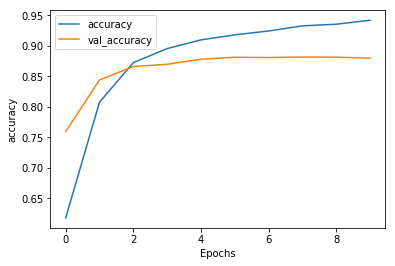

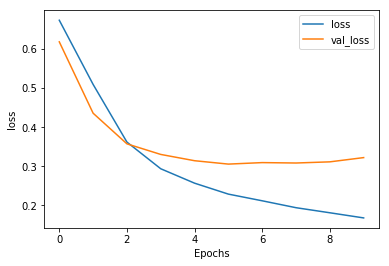

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)
